In [2]:
#find out how recurrent across samples the CpG mutations in MALY are 
#construct dictionary that maps location of C>T/G>A mutations in a CpG context to a list of all the samples that mutation was found in
import pandas as pd
import pickle
df = pd.read_csv('/data/khandekara2/mutation_data/processed_data/MALY_mutation.bed.CpG_only', sep='\t')
mutation_dict = {} #key is chromosomal location, value is list with id's of all samples that the the mutation occurred in

#add location column
locations = []
for chrom, start, stop in zip(list(df['#chromosome']), list(df['start']), list(df['stop'])):
    locations.append((chrom, start, stop))
df['location'] = locations

#populate dictionary   
for loc, sample in zip(df.location, df.id):
    coords = (str(loc[0]), int(loc[1]), int(loc[2]))
    if loc not in mutation_dict:
        mutation_dict[coords] = []
    mutation_dict[coords].append(sample)

In [3]:
#check to make sure that dictionary items are correct
import random
coord, samples = random.choice(list(mutation_dict.items()))
print (coord)
print (samples)

('chr6', 53254790, 53254792)
['tumor_4145528']


In [4]:
recurrence = []
for key, value in mutation_dict.items():
    recurrence.append(len(mutation_dict[key]))


/usr/local/Anaconda/envs/py3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


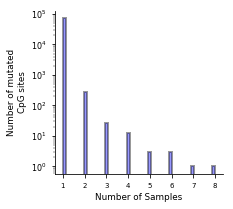

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('seaborn-paper')
plt.rcParams['xtick.labelsize'] = 7
fig5 = plt.figure(figsize=(3,3))
ax = fig5.add_subplot(111)
ax = sns.distplot(recurrence, kde=False, rug=False, color='blue', hist_kws=dict(edgecolor="k", linewidth=2))
ax.set_yscale('log')
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
ax.set_ylabel('Number of mutated\nCpG sites')
ax.set_xlabel('Number of Samples')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [9]:
fig5.savefig('/data/khandekara2/figures/MALY_mutation_recurrence.png', dpi=600, bbox_inches="tight")

/usr/local/Anaconda/envs/py3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


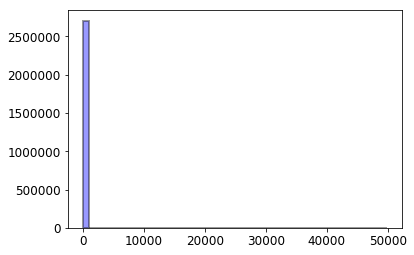

In [36]:
#now repeat exact same process for all C>T/G>A mutations in a CpG context observed in cancer 
df = pd.read_csv('/data/khandekara2/mutation_data/processed_data/test.bed', sep='\t')
all_mutation_dict = {} #key is chromosomal location, value is list with id's of all samples that the the mutation occurred in

#add location column
locations = []
for chrom, start, stop in zip(list(df['#chromosome']), list(df['start']), list(df['stop'])):
    locations.append((chrom, start, stop))
df['location'] = locations

#populate dictionary   
for loc, sample in zip(df.location, df.id):
    coords = (str(loc[0]), int(loc[1]), int(loc[2]))
    if coords not in all_mutation_dict:
        all_mutation_dict[coords] = []
    all_mutation_dict[coords].append(sample)

all_recurrence = []
for key, value in all_mutation_dict.items():
    all_recurrence.append(len(all_mutation_dict[key]))

sns_plot = sns.distplot(all_recurrence, kde=False, rug=False, color='blue', hist_kws=dict(edgecolor="k", linewidth=2))


df = pd.read_csv('/data/khandekara2/mutation_data/processed_data/all_CpG_mutations.bed', sep='\t')


In [31]:
df.head()


,#chromosome,start,stop,id,mutated_from,mutated_to,total_reads,variant_reads,annotation,gene_id,fasta,location
0,chr14,99641435,99641436,TCGA-GC-A3YS-01A-11D-A23M-08,C,T,MISSING,MISSING,synonymous_variant,ENSG00000127152,cg,"(chr14, 99641435, 99641436)"
1,chr1,228399582,228399583,TCGA-GC-A3YS-01A-11D-A23M-08,C,T,MISSING,MISSING,synonymous_variant,ENSG00000154358,CG,"(chr1, 228399582, 228399583)"
2,chr16,75670390,75670391,TCGA-GC-A3YS-01A-11D-A23M-08,C,T,MISSING,MISSING,downstream_gene_variant,ENSG00000065427,CG,"(chr16, 75670390, 75670391)"
3,chr19,3819085,3819086,TCGA-GC-A3YS-01A-11D-A23M-08,C,T,MISSING,MISSING,missense_variant,ENSG00000105278,CG,"(chr19, 3819085, 3819086)"
4,chr7,99621897,99621898,TCGA-GC-A3YS-01A-11D-A23M-08,C,T,MISSING,MISSING,exon_variant,ENSG00000106261,CG,"(chr7, 99621897, 99621898)"


In [32]:
print (set(all_recurrence))

{1024, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 24, 25, 26, 27, 28, 30, 32, 33, 35, 36, 39, 40, 41, 42, 44, 45, 48, 49, 50, 54, 56, 60, 572, 63, 64, 576, 3136, 65, 70, 72, 75, 77, 80, 81, 9300, 88, 90, 100, 1640, 104, 110, 120, 121, 17533, 126, 132, 645, 1156, 136, 143, 144, 150, 153, 156, 676, 168, 169, 180, 1204, 182, 196, 711, 1225, 210, 49887, 225, 231, 6888, 245, 256, 8194, 779, 784, 21276, 288, 289, 820, 315, 324, 1364, 858, 861, 361, 380, 900, 902, 400, 13200, 5530, 441, 961, 1482, 980, 20448, 484, 2025}


In [35]:
print (df.id.nunique())

8825
